# 1.Изучение данных из файлов

In [1]:
#Импортируем нужные нам библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
#Читаем датафрейм
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
#Выводим датафрейм
display(games_df.head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Первым делом нам бросается в глаза написание названий колонок в верхнем регистре, в следующем шаге исправим это

# 2.Предобработка данных

In [4]:
#Исправляем регистр с помощью str.lower()
games_df.columns = games_df.columns.str.lower()

Нужно проверить значения на уникальность (отсутсвие неявных дубликатов) в нескольких столбцах

In [5]:
games_df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [6]:
games_df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [8]:
#Посмотрим общую информацию по датафрейму, обратим внимание на отличиные количества значений и типы данных
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Тут я обратила внимание на то, что при визуализации первых строк датафрейма в колонке critic_score видны только целые значения, несмотря на тип данных float, далее нужно будет проверить так ли это. Возможно, такой тип данных существует из-за пропущенных значений.

In [9]:
#Посмотрим на количество пропущенных значений по столбцам
games_df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
games_df.shape

(16715, 11)

В некоторых столбцах(например, critic_score, user_score, rating, year_of_release, name) есть пропущенные значения,больше всего их в оценках критиков/ пользователей и в столбце с рейтингом ESRB.
По моим предположениям, пропуски в столбце с рейтингом могут быть потому что возрастной рейтинг выставляет Американское агентсво, но не все игры идут на Американский рынок и, соответственно, агентсво может не заниматься, например, играми, которые идут только на Европейский рынок или только на Японский.

Не считаю это обязательным, но заменю nan на absent в 'rating'

In [11]:
games_df['rating'] = games_df['rating'].fillna('absent')

In [12]:
#Посмотрим на все значения по столбцу critic_score
games_df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Все значения оказались целочисленными, а значит нужно перевести их в соответствующий тип данных, но мы помним о большом количестве пропусков в столбце, а значит сначала должны устранить их и лучшим решением, на мой скромный взгляд, будет решение о замене отсутствующих значений на 0.

In [13]:
#Производим замену nan на 0
games_df['critic_score'] = games_df['critic_score'].fillna(0)

In [14]:
#Меняем тип данных
games_df['critic_score'] = games_df['critic_score'].astype(int)

In [15]:
#Проверка
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       10014 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


К сожалению, мы не можем записать год выхода в формате даты, имея только год, но мы можем хотя бы поменять тип данных на целочисленный. Опять же, первым делом заполним пропуски.

In [16]:
games_df['year_of_release'] = games_df['year_of_release'].fillna(0)

In [17]:
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

Методом проб и ошибок я пыталась перевести 'user_score' в более подходящий тип данный и выяснила наличие абревиатуры tbd ("Будет объявлено позднее" в переводе) в данном столбце, она видна в списке уникальных значений ниже.

In [18]:
games_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Перед тем, как добавить заглушки в 'user_score' нужно посмотреть сколько 0 уже есть в данных в этом столбце

In [19]:
games_df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
1.5       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В данных по столбцу всего лишь один 0, я думаю мы можем добавить заглушки, а перед подсчётом корреляции удалить все строки с 0 

In [20]:
#Заменим tbd на nan
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = np.nan

In [21]:
#Nan заменим на 0
games_df['user_score'] = games_df['user_score'].fillna(0)

In [22]:
#Меняем тип данных
games_df['user_score'] = games_df['user_score'].astype(float)

In [23]:
#Проверка всех замен (user_score с float на int, critic_score с float на int, year_of_release  с float на int)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [24]:
#Проверка на строки-дубликаты
games_df.duplicated().sum()

0

In [25]:
#Смотрим на количество игр с одинаковым названием и консолью
games_df.duplicated(subset = ['name', 'platform']).sum()

5

In [26]:
#Выведем строки-дубликаты по имени и названию консоли
games_df[games_df.duplicated(subset = ['name', 'platform'], keep=False) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0,0.0,absent
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+
4127,Sonic the Hedgehog,PS3,0,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0,0.0,absent
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


Задача осложнена тем, что нам не понятно какие строки удалять, а какие оставлять, разберём каждый случай отдельно.
1)В случае игры Madden NFL 13 я удалю строку, где продажи игры почти отсутствуют
2)В случае Need for Speed: Most Wanted я обратила внимание на разные годы выхода игр, краткий гуглинг подтвердил, что действительно игра выходила и в 2005, и в 2012. На экране у нас выведены аж 4 подобных игры, но там, где одинаковы платформы- отличны годы выхода игр, и, наоборот. Это не неявнные дубликаты, оставляем.
3)Строки с пропусками в названии игры нам вообще не нужны, однозначно удаляем.
4)В одной из строк с игрой Sonic the Hedgehog не указан год выхода игры, удалим её ибо мы не можем идентифицировать её как дубликат или не дубликат.

In [27]:
games_df = games_df.query('name != "Sonic the Hedgehog" and year_of_release != 0')

In [28]:
games_df = games_df.query('name != "Madden NFL 13" and platform != "PS3" and na_sales != 0.00')

In [29]:
games_df = games_df.dropna()

In [30]:
#Посмотрим где остались пропущенные значения
games_df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [31]:
#Nan заменим на absent
games_df['genre'] = games_df['genre'].fillna('absent')

In [32]:
#Проверяем
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10997 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10997 non-null  object 
 1   platform         10997 non-null  object 
 2   year_of_release  10997 non-null  int64  
 3   genre            10997 non-null  object 
 4   na_sales         10997 non-null  float64
 5   eu_sales         10997 non-null  float64
 6   jp_sales         10997 non-null  float64
 7   other_sales      10997 non-null  float64
 8   critic_score     10997 non-null  int64  
 9   user_score       10997 non-null  float64
 10  rating           10997 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.0+ MB


In [33]:
games_df['total_sales_sum'] = games_df[["eu_sales", "jp_sales", "na_sales", "other_sales"]].sum(axis=1)

# Просмотр основных показателей

In [34]:
#Посмотрим минимальные значения по датафрейму
games_df.min()

name                Fire Emblem Fates
platform                         2600
year_of_release                  1980
genre                          Action
na_sales                         0.01
eu_sales                          0.0
jp_sales                          0.0
other_sales                       0.0
critic_score                        0
user_score                        0.0
rating                             AO
total_sales_sum                  0.01
dtype: object

Подозрительно выглядит нулевой год выхода игры (он появился после замены Nan), посмотрим на эти строки

In [35]:
#Посмотрим на строки с нулевым годом выхода игр
games_df.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_sum


In [36]:
#Удалим строчки игр с нулевым годом выпуска
games_df = games_df.query('year_of_release != 0')

In [37]:
#Посмотрим на максимальные значения по строкам датафрейма
games_df.max()

name               uDraw Studio: Instant Artist
platform                                   XOne
year_of_release                            2016
genre                                  Strategy
na_sales                                  41.36
eu_sales                                  28.96
jp_sales                                  10.22
other_sales                               10.57
critic_score                                 98
user_score                                  9.6
rating                                   absent
total_sales_sum                           82.54
dtype: object

In [38]:
#Посмотрим на средние значения по строкам датафрейма
games_df.mean()

year_of_release    2005.751841
na_sales              0.358673
eu_sales              0.181378
jp_sales              0.066334
other_sales           0.057105
critic_score         41.046831
user_score            3.891052
total_sales_sum       0.663489
dtype: float64

In [39]:
#Посмотрим на медианные значения по строкам датафрейма
games_df.median()

year_of_release    2006.00
na_sales              0.13
eu_sales              0.04
jp_sales              0.00
other_sales           0.01
critic_score         55.00
user_score            4.80
total_sales_sum       0.23
dtype: float64

На мой взгляд,  многие медианные значения выглядят странно, потому что  отлчаются от среднего по датафрейму, особенно сильно у нас выделяется столбец critic_score. Посмотрим на стандартное отклонение и димперсию.

In [40]:
np.var(games_df)

year_of_release      32.366079
na_sales              0.924598
eu_sales              0.330523
jp_sales              0.118948
other_sales           0.044955
critic_score       1243.790023
user_score           14.008402
total_sales_sum       3.292344
dtype: float64

In [41]:
games_df.std()

year_of_release     5.689378
na_sales            0.961604
eu_sales            0.574937
jp_sales            0.344904
other_sales         0.212036
critic_score       35.269011
user_score          3.742950
total_sales_sum     1.814564
dtype: float64

Стандартное отклонение и дисперсия более наглядно показывают нам разброс в наших данных. Постараемся выяснить природу этого разброса

In [42]:
#Посмотрим количества уникальных значений по столбцу critic_score
games_df['critic_score'].value_counts()

0     4406
71     213
70     205
73     198
68     195
      ... 
24       4
20       3
29       3
98       2
21       1
Name: critic_score, Length: 80, dtype: int64

In [43]:
#Посмотрим количества уникальных значений по столбцу user_score
games_df['user_score'].value_counts()

0.0    5036
7.8     266
8.0     238
8.5     221
8.2     219
       ... 
1.3       2
0.5       1
0.2       1
1.0       1
1.9       1
Name: user_score, Length: 94, dtype: int64

Но мы помним, что изначально выяснили отсутствие пользовательской оценки или оценки критиков во многих столбцах и заменили nan на 0,поэтому ничего подозрительного в таком количестве нулей нет.
Перейдем к продажам, помня о том, что в продажах у нас не было пропусков. Также, сможем оценить правдоподобность максимальных значений, которые мы выводили выше. 
Я предлагаю построить диаграммы размаха для оценки правдоподобности данных:

<AxesSubplot:title={'center':'na_sales'}>

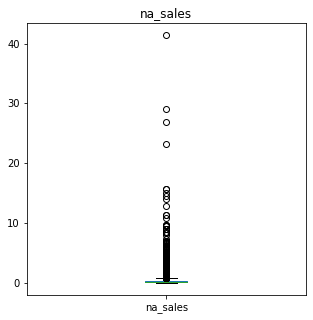

In [44]:
#Построим диаграмму размаха, она же ящик с усами
plt.figure(figsize=(5,5))
games_df['na_sales'].plot.box(title = 'na_sales')

<AxesSubplot:title={'center':'na_sales'}>

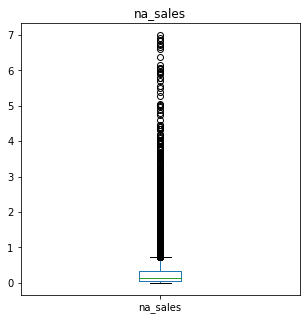

In [45]:
#Ограничим значения, чтобы из диаграммы размаха было видно сам ящик
games_na_less_than_seven = games_df.query('na_sales < 7')
plt.figure(figsize=(5,5))
games_na_less_than_seven['na_sales'].plot.box(title = 'na_sales')

Как мы можем заметить из ящика с усами, большая часть значений лежит в промежутке менее единицы (это не удивительно, ведь подсчёт ведётся в миллионах проданных копий), при этом разброс данных довольно большой. 

In [46]:
#Посмотрим количества уникальных значений по столбцу na_sales
games_df['na_sales'].value_counts()

0.02    539
0.03    535
0.04    522
0.01    511
0.05    496
       ... 
3.19      1
8.92      1
2.13      1
6.82      1
4.12      1
Name: na_sales, Length: 386, dtype: int64

Скорее всего, игры порой не продавалась на территории Северной Америки и отсюда вытекает такое внушительное количество нулей.

In [47]:
#Посмотрим на строки с максимальными значениями по столбцу
games_df.query('na_sales >= 20')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,absent,40.24
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,absent,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,absent,28.31


Ничего подозрительного в строках по столбцу na_sales со значениями, которые имеют большой отрыв от данных в других строках по этому же столбцу, нет. Кроме того, все эти игры мне известны и они действительно очень популярны.

<AxesSubplot:title={'center':'eu_sales'}>

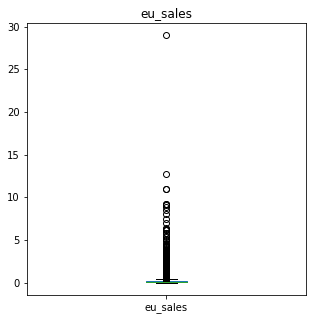

In [48]:
#Построим диаграмму размаха, она же ящик с усами
plt.figure(figsize=(5,5))
games_df['eu_sales'].plot.box(title = 'eu_sales')

<AxesSubplot:title={'center':'eu_sales'}>

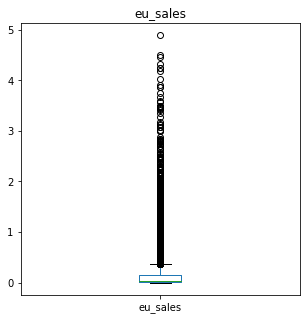

In [49]:
#Ограничим значения, чтобы из диаграммы размаха было видно сам ящик
games_eu_less_than_five = games_df.query('eu_sales < 5')
plt.figure(figsize=(5,5))
games_eu_less_than_five['eu_sales'].plot.box(title = 'eu_sales')

Ситуация по продажам в Европе не сильно отличается от предыдущего кейса, основная часть значений всё также лежит в промежутке 0-менее единицы, а если быть точнее, то менее 0.5. Визуально видно, что медианное значение меньше, чем в предыдущем случае

In [50]:
#Посмотрим количества уникальных значений по столбцу eu_sales
games_df['eu_sales'].value_counts()

0.00    2272
0.01    1177
0.02     994
0.03     705
0.04     570
        ... 
4.19       1
1.62       1
1.49       1
2.05       1
2.89       1
Name: eu_sales, Length: 284, dtype: int64

In [51]:
#Посмотрим на строки с максимальными значениями по столбцу
games_df.query('eu_sales >= 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,0.0,absent,24.67


Опять же, не вижу ничего подозрительного

<AxesSubplot:title={'center':'jp_sales'}>

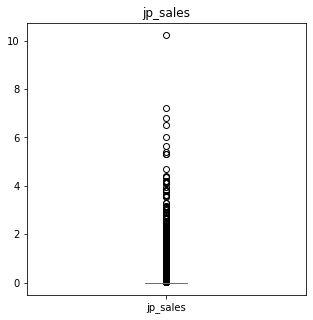

In [52]:
#Построим диаграмму размаха, она же ящик с усами
plt.figure(figsize=(5,5))
games_df['jp_sales'].plot.box(title = 'jp_sales')

<AxesSubplot:title={'center':'jp_sales'}>

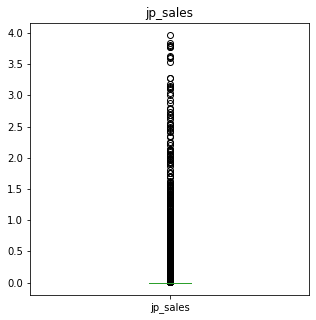

In [53]:
#Ограничим значения, чтобы из диаграммы размаха было видно сам ящик
games_jp_less_than_four = games_df.query('jp_sales < 4')
plt.figure(figsize=(5,5))
games_jp_less_than_four['jp_sales'].plot.box(title = 'jp_sales')

Тут видно, что основная часть значений лежит даже в ещё более маленьком промежутке, чем предыдущие, метод value_counts() должен подтвердить нам это:

In [54]:
#Посмотрим количества уникальных значений по столбцу jp_sales
games_df['jp_sales'].value_counts()

0.00    8757
0.01     304
0.02     207
0.03     158
0.04     128
        ... 
2.87       1
2.12       1
2.66       1
1.97       1
3.03       1
Name: jp_sales, Length: 221, dtype: int64

Япония является самыми непопулярным регионом для продаж компьютерных игр из трёх указанных.

In [55]:
#Посмотрим на строки с максимальными значениями по столбцу
games_df.query('jp_sales >= 7')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_sum
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,absent,31.38
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,0,0.0,absent,23.09


Выбросов в столбце jp_sales нет.

<AxesSubplot:title={'center':'other_sales'}>

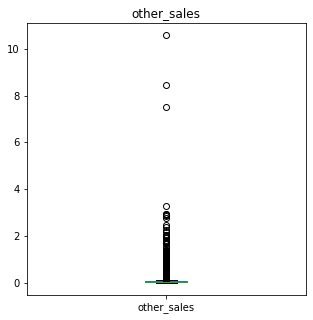

In [56]:
#Построим диаграмму размаха, она же ящик с усами
plt.figure(figsize=(5,5))
games_df['other_sales'].plot.box(title = 'other_sales')

<AxesSubplot:title={'center':'other_sales'}>

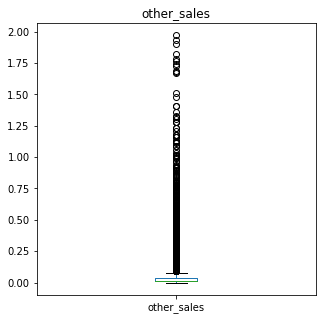

In [57]:
#Ограничим значения, чтобы из диаграммы размаха было видно сам ящик
games_other_less_than_two = games_df.query('other_sales < 2')
plt.figure(figsize=(5,5))
games_other_less_than_two['other_sales'].plot.box(title = 'other_sales')

Ситуация аналогична предыдущим, вместе с тем можно заметить и снижение размера промежутка, где лежит основная часть значений

In [58]:
#Посмотрим количества уникальных значений по столбцу other_sales
games_df['other_sales'].value_counts()

0.01    2826
0.00    2726
0.02    1355
0.03     778
0.04     554
        ... 
1.06       1
2.84       1
0.81       1
1.68       1
1.93       1
Name: other_sales, Length: 143, dtype: int64

In [59]:
#Посмотрим на строки с максимальными значениями по столбцу
games_df.query('other_sales >= 6')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65


Тоже нет ничего подозрительно, а значит можно переходить к следующему шагу.

# 3.Исследовательский анализ данных

## Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Определенная игра может выйти в определенный год, но сразу на нескольких платформах, но нам нужно распределение именно уникальных игр по годам. Поищем дубликаты по названию и году выхода, оценим их визуально:

In [60]:
games_df[games_df.duplicated(subset = ['name', 'year_of_release']) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_sum
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,absent,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,0,0.0,absent,4.87
222,LEGO Star Wars: The Complete Saga,DS,2007,Action,2.83,1.48,0.00,0.45,80,5.4,E,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...
16633,SBK Superbike World Championship,PSP,2008,Racing,0.01,0.00,0.00,0.00,0,0.0,E10+,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,absent,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,0,0.0,M,0.01
16673,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81,8.8,M,0.01


In [61]:
#Удалим найденные дубликаты
unique_games_df = games_df.drop_duplicates(subset = ['name', 'year_of_release'])

In [62]:
#Посчитаем количество выпущенных игр по годам путём группировки
games_by_years = unique_games_df.groupby('year_of_release', as_index=False)['name'].count()

In [63]:
#Меняем название столбца для более логичной передачи смысла 
games_by_years = games_by_years.rename(columns = {'name': 'count_of_games'})

In [64]:
#Смотрим на датафрейм
display(games_by_years.head(5))

,year_of_release,count_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,10


In [65]:
#Удаляем нулевой индекс
games_by_years = games_by_years.query('index != 0')

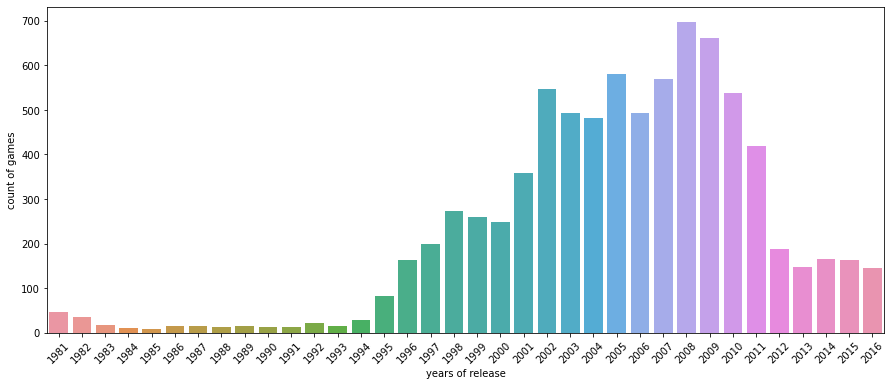

In [66]:
#Строим столбчатую диаграмму по датафрейму games_by_years с вертикальной осью 
#из значений year_of_release и горизонтальной name
plt.figure(figsize=(15,6))
games_by_years_graph = sns.barplot(data = games_by_years, x = 'year_of_release', y = 'count_of_games')
#Установим названия осей
games_by_years_graph.set(xlabel = 'years of release', ylabel = 'count of games')
#Чтобы года были видны, нам нужно немного повернуть их
for item in games_by_years_graph.get_xticklabels():
    item.set_rotation(45)

Как мы видим из графика выше, количество выпущенных игр росло в среднем до 2011 года, потом произошёл резкий спад до уровня ниже уровня начала века. У меня есть предположение, что с развитием производства смартфонов, люди стали меньше играть в компьютерные игры, некоторые перешли на игры в своих смартфонах, соответственно с упадком спроса упало и предложение.
На мой взгляд, актуальный период для будущих исследований-это период последних 3 лет, с 2014 по 2016.

## Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Тут мы возвращаемся к использованиб games_df вместо unique_games_df по причине того, что нам, наоборот, нужны не уникальные игры, а все платформы, даже если игры на них повторяются:

In [67]:
#Сгрупируем датафрейм по количеству продаж на платформах
platform_sum_df = games_df.groupby('platform', as_index=False)['total_sales_sum'].sum()

In [68]:
#Выведем топ 5 платформ по количеству продаж
platform_sum_df.nlargest(5, 'total_sales_sum')

,platform,total_sales_sum
12,PS2,1159.23
21,X360,953.55
19,Wii,869.79
3,DS,734.82
11,PS,665.31


In [69]:
#Создадим датафрейм с самыми популярными по количеству продаж платформами
top_platforms = games_df.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS"')

In [70]:
#Делаем сводную таблицу, где посчитаны продажи с топовых платформ по годам, 
#T меняет строки местами со столбцами, fill_value=0 - заменяет Nan на 0
platforms_by_years = top_platforms.pivot_table(index = 'year_of_release', 
                                               columns = 'platform', values = 'total_sales_sum', 
                                               aggfunc = "sum",  fill_value=0).T

In [71]:
#Выведем получившийся датафрейм
display(platforms_by_years)

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
DS,0.0,0.00,0.00,0.00,16.82,127.64,106.18,134.83,133.85,107.40,74.83,21.62,10.47,1.18,0.00,0.00,0.00
PS2,36.0,161.99,196.84,175.81,201.35,152.48,90.75,67.84,47.94,22.96,4.99,0.28,0.00,0.00,0.00,0.00,0.00
Wii,0.0,0.00,0.00,0.00,0.00,0.00,136.93,151.61,168.11,201.62,124.04,55.70,18.78,8.02,3.70,1.10,0.18
X360,0.0,0.00,0.00,0.00,0.00,8.24,50.45,95.30,135.12,119.70,169.01,142.68,96.56,88.47,34.69,11.83,1.50


<AxesSubplot:xlabel='year_of_release'>

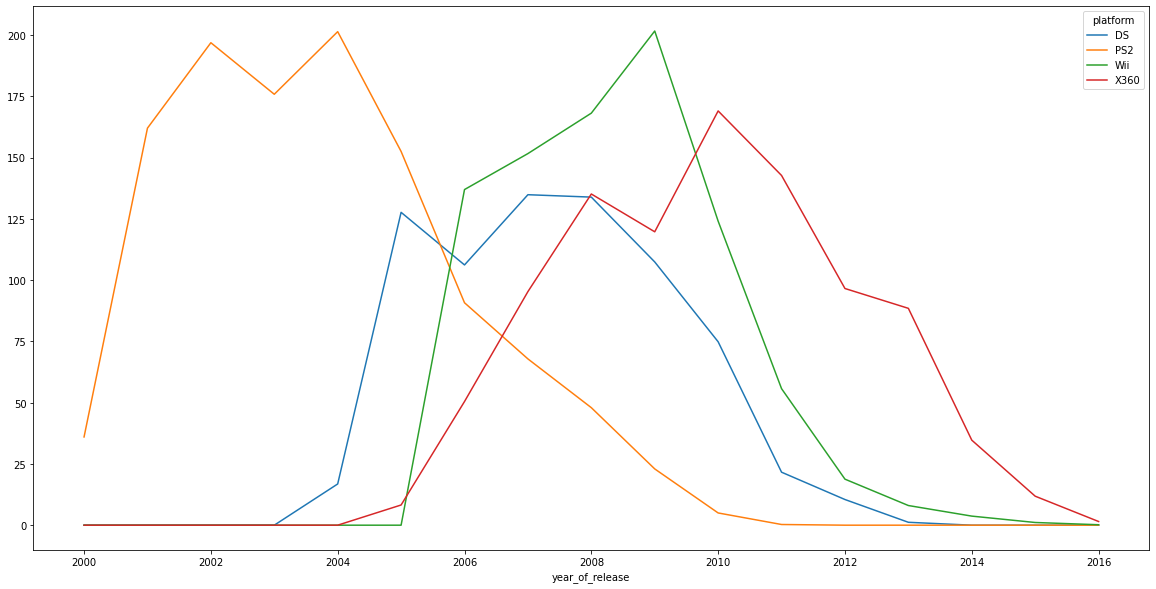

In [72]:
#Сделаем график распределения продаж самых популярных платформ по годам.
platforms_by_years.T.plot(figsize=(20,10))

Как мы видим выше, все самые популярные платформы стали таковыми в разные периоды времени. Платформа PS2 успешно существовала дольше остальных платформ, X360 тоже существовала долгий период, с 1985 года, но на протяжении всего периода до 2005 года не продавала игры. Остальные три платформы появились позднее, что впрочем никак не сказалось на их популярности. Пик популярности платформы PS2 начался раньше всех и закончился тоже раньше. На период 2015 года, самыми актуальными в плане популярности платформами являлись X360, несмотря на своё долгое существование и PS3. Назвать платформы Wii, DS и PS2 популярными в 2015 году мы не можем, их продажи близки к 0 копий. Пик популярности платформ длится не очень долгий период, визуально, за 10 или менее лет платформа становится не популярной, пик продаж откатывается до нулевых или малых значений.

Ранее мы выяснили, что актуальная информация-это информация старше 2013 года. Соответственно, далее мы будем использовать более актуальную информацию.

In [73]:
#Создадим датафрейм, состоящий из исключительно актуальной информации
games_actual_df = games_df.query('year_of_release >= 2014')

## Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [74]:
#Создадим новый датафрейм путём группировки датафрейма games_actul_df 
#по количеству продаж на разных платформах
platforms_actual_df = games_actual_df.groupby('platform', as_index=False)['total_sales_sum'].count()

In [75]:
#Выведем таблицу с топ-5 платформами по количеству продаж
top_platforms = platforms_actual_df.nlargest(5, 'total_sales_sum')
display(top_platforms)

,platform,total_sales_sum
2,PS4,278
7,XOne,208
6,X360,103
0,3DS,85
1,PC,63


In [76]:
#Выведем таблицу с самыми плохими пятью платформами по количеству продаж
platforms_actual_df.nsmallest(5, 'total_sales_sum')

,platform,total_sales_sum
4,Wii,7
5,WiiU,56
3,PSV,61
1,PC,63
0,3DS,85


In [77]:
platforms_by_years_dynamics = games_actual_df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales_sum', aggfunc = "sum",  fill_value=0).T

In [78]:
display(platforms_by_years_dynamics)

year_of_release,2014,2015,2016
platform,,,
3DS,36.55,19.85,10.73
PC,11.38,6.73,4.11
PS4,99.31,116.44,65.74
PSV,8.20,1.72,0.84
Wii,3.70,1.10,0.18
WiiU,21.59,16.21,4.55
X360,34.69,11.83,1.50
XOne,54.01,59.96,26.07


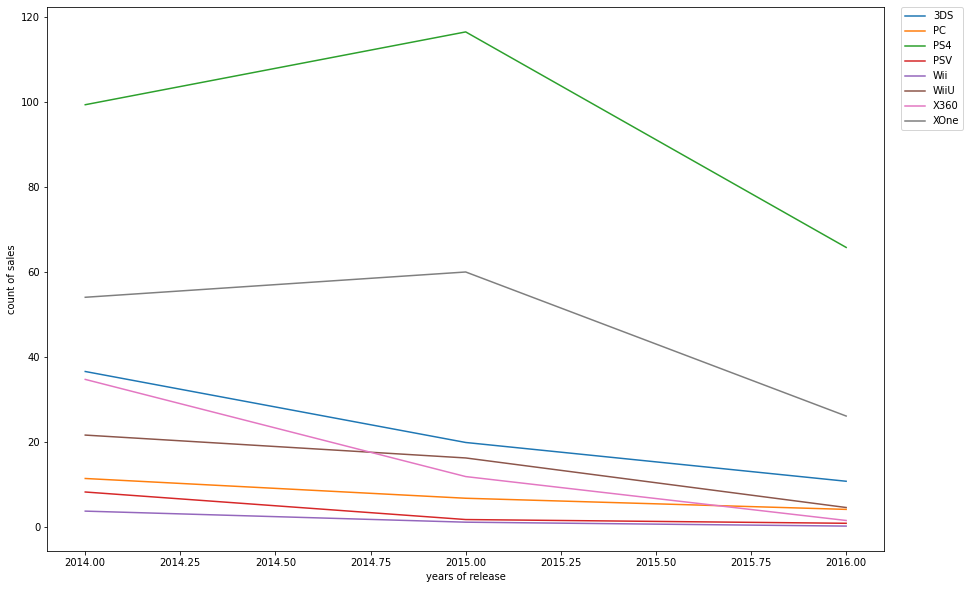

In [79]:
#Сделаем график распределения продаж актуальных платформ по годам.
sales_by_years_graph = platforms_by_years_dynamics.T.plot(figsize = (15, 10))
#Установим названия осей
sales_by_years_graph.set(xlabel = 'years of release', ylabel = 'count of sales')
plt.legend(fontsize=9, shadow=False, framealpha=1, facecolor='y', edgecolor='r', title='Легенда')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

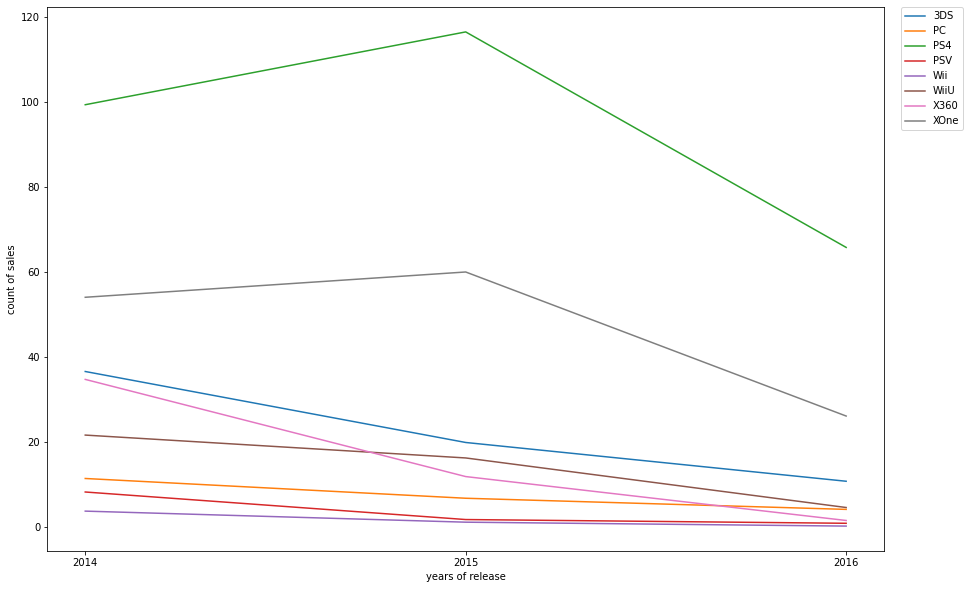

In [80]:
ticks = np.arange(2014, 2017, 1)

#Сделаем график распределения продаж актуальных платформ по годам.
sales_by_years_graph = platforms_by_years_dynamics.T.plot(figsize = (15, 10))

#Установим названия осей
sales_by_years_graph.set(xlabel = 'years of release', ylabel = 'count of sales', xticks=ticks)

plt.legend(fontsize=9, shadow=False, framealpha=1, facecolor='y', edgecolor='r', title='Легенда')

plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

<div class="alert alert-danger">
<b>**КОД РЕВЬЮЕРА. КОНЕЦ**</b></div>

На мой взгляд, платформы PS4 и Xone находятся в стадии постепенного роста и могут быть потенциально прибыльными, но из-за неполных данных 2016 года на графике это выглядит немного по-другому. Продажи на остальных платформах находятся в стадии регрессии.

## Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

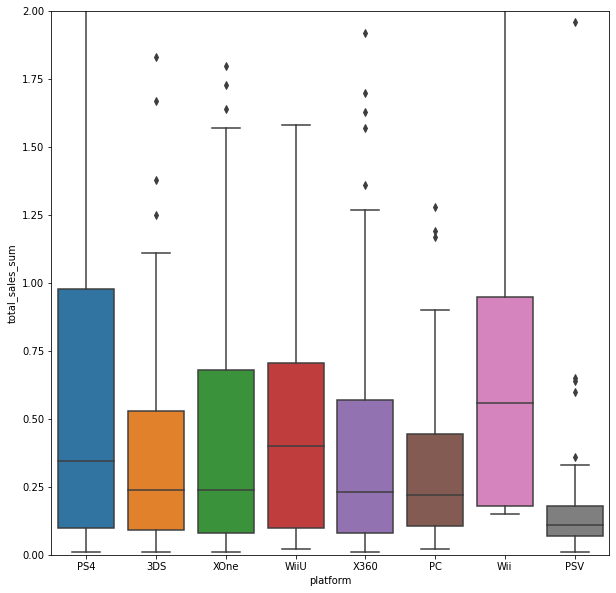

In [81]:
plt.figure(figsize=(10,10))
sns.boxplot(data = games_actual_df, x = 'platform', y = 'total_sales_sum')
#Установка диапазона оси 
plt.ylim([0,2])
plt.show()

Как мы видим, в данных по всем платформам за исключением PS2 есть расконцентрация числовых значений, так называемые, выбросы- у каких-то платформ их больше, у каких-то меньше.

## Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [82]:
#Создадим новый датафрейм путём группировки датафрейма games_actual_df по медианному значению продаж во всех регионах
genre_actual_df = games_actual_df.groupby('genre', as_index=False)['total_sales_sum'].median().nlargest(11, 'total_sales_sum')

In [83]:
#Выведим на экран датафрейм
display(genre_actual_df)

,genre,total_sales_sum
8,Shooter,0.590
5,Puzzle,0.480
10,Sports,0.450
3,Misc,0.320
7,Role-Playing,0.250
6,Racing,0.235
2,Fighting,0.225
11,Strategy,0.225
0,Action,0.210
9,Simulation,0.210


Как мы видим из таблицы, согласно актуальным данным, абсолютно лидирует по медианному значению продаж по всем регионам среди игровых жанров жанр шутер, далее геймеры любят жанр пазлов и спортс жанр. 
А вот самыми непопулярными оказались игры в жанре экшн, платформеры и симуляции.

## Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

В качестве платформы я выбрала PS4-она абсолютно лидирует по количеству продаж, хотя в последнее время находится в регрессивном состоянии, как было видно из графика

In [84]:
#Создаём датафрейм по платформе PS4
ps4_df = games_actual_df.query('platform == "PS4"')

In [85]:
#Посмотрим на среднюю сумму продаж игр на этой платформе
ps4_df['total_sales_sum'].mean()

1.0125539568345323

До добавления заглушек в столбец critic_score нулей там не было, значит мы можем убрать все значения с нулями (ранее значения там отсутствовали) и посчитать корреляцию, а также построить для нее график. В столбце с оценками пользователей был всего лишь один 0, так что сделаем тоже самое.

In [86]:
ps4_without_nan = ps4_df.query('critic_score != 0 & user_score != 0')

Text(0, 0.5, 'total sales sum')

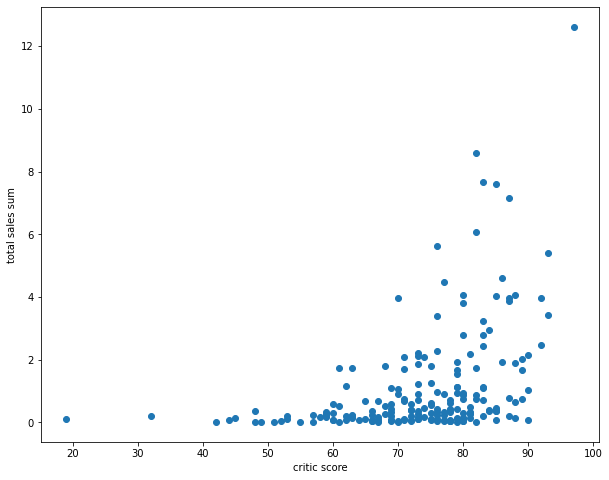

In [87]:
#Построим диаграмму рассения,чтобы увидеть взаимосвязь оценки критиков ('critic_score') с суммой количества продаж
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x = ps4_without_nan['critic_score'], y = ps4_without_nan['total_sales_sum'])
#Установим названия для оосей
plt.xlabel('critic score')
plt.ylabel('total sales sum')

In [88]:
#Выведем корреляцию между оценкой критиков и суммой количества продаж
print(ps4_without_nan['critic_score'].corr(ps4_without_nan['total_sales_sum']))

0.41034617087804137


Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж.

Text(0, 0.5, 'total sales sum')

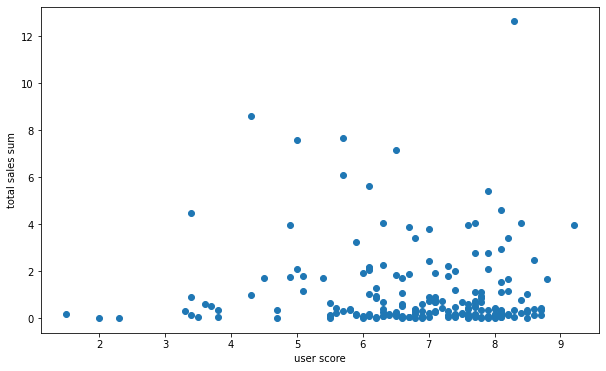

In [89]:
#Построим диаграмму рассения,чтобы увидеть взаимосвязь пользовательской оценки ('user_score') с суммой 
#количества продаж
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = ps4_without_nan['user_score'], y = ps4_without_nan['total_sales_sum'])
#Установим названия для осей
plt.xlabel('user score')
plt.ylabel('total sales sum')

In [90]:
#Выведем корреляцию между пользовательской оценкой и суммой количества продаж
print(ps4_without_nan['user_score'].corr(ps4_without_nan['total_sales_sum']))

-0.05040921218905368


Оценки пользователей корреляции с продажами не имеют, линейная взаимосвязь почти отсутствует

Теперь-наша задача посчитать аналогичные корреляции, но для других платформ, напомним их названия:

In [91]:
games_actual_df['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'X360', 'PC', 'Wii', 'PSV'],
      dtype=object)

In [92]:
xone_platform_df = games_actual_df.query('platform == "XOne"')

In [93]:
xone_platform_df = xone_platform_df.query('critic_score != 0 & user_score != 0')

In [94]:
#Выведем корреляцию между пользовательской оценкой и суммой количества продаж
print(xone_platform_df['user_score'].corr(xone_platform_df['total_sales_sum']))

-0.08477256681667301


Корреляция, как и в случае с платформой лидером PS4 очень низкая. Кроме того, у двух корреляций совсем небольшое числовое отличие

In [95]:
#Выведем корреляцию между оценкой критиков и суммой количества продаж
print(xone_platform_df['critic_score'].corr(xone_platform_df['total_sales_sum']))

0.41626518382102634


Корреляция, как и в случае с платформой лидером PS4 средне-низкая. Кроме того, у двух корреляций совсем небольшое числовое отличие

Посчитаем корреляции для платформы 3DS:

In [96]:
three_ds_platform_df = games_actual_df.query('platform == "3DS"')

In [97]:
three_ds_platform_df = three_ds_platform_df.query('critic_score != 0 & user_score != 0')

In [98]:
#Выведем корреляцию между пользовательской оценкой и суммой количества продаж
print(three_ds_platform_df['user_score'].corr(three_ds_platform_df['total_sales_sum']))

0.2929137802289638


Корреляция выше, чем в случае платформы-лидера, но всё также считается низкой

In [99]:
#Выведем корреляцию между оценкой критиков и суммой количества продаж
print(three_ds_platform_df['critic_score'].corr(three_ds_platform_df['total_sales_sum']))

0.2870345456592367


Корреляция незначительно ниже, чем в случае с платформой-лидером.

Аналогичная работа для платформы X360:

In [100]:
x_platform_df = games_actual_df.query('platform == "X360"')

In [101]:
x_platform_df = x_platform_df.query('critic_score != 0 & user_score != 0')

In [102]:
#Выведем корреляцию между пользовательской оценкой и суммой количества продаж
print(x_platform_df['user_score'].corr(x_platform_df['total_sales_sum']))

0.3772036398549073


Корреляция выше, чем в случае платформы-лидера, но всё также считается низкой

In [103]:
#Выведем корреляцию между оценкой критиков и суммой количества продаж
print(x_platform_df['critic_score'].corr(x_platform_df['total_sales_sum']))

0.5215784225421515


Корреляция выше, чем в случае с платформой-лидером и мы можем считать её средней

Корреляции для платформы PC:

In [104]:
pc_platform_df = games_actual_df.query('platform == "PC"')

In [105]:
pc_platform_df = pc_platform_df.query('critic_score != 0 & user_score != 0')

In [106]:
#Выведем корреляцию между пользовательской оценкой и суммой количества продаж
print(pc_platform_df['user_score'].corr(pc_platform_df['total_sales_sum']))

-0.12355745623401564


In [107]:
#Выведем корреляцию между оценкой критиков и суммой количества продаж
print(pc_platform_df['critic_score'].corr(pc_platform_df['total_sales_sum']))

0.09588667357471549


Корреляция очень низкая, ниже, чем в случае с платформой-лидером

Для PSV:

In [108]:
psv_platform_df = games_actual_df.query('platform == "PSV"')

In [109]:
psv_platform_df = psv_platform_df.query('critic_score != 0 & user_score != 0')

In [110]:
#Выведем корреляцию между пользовательской оценкой и суммой количества продаж
print(psv_platform_df['user_score'].corr(psv_platform_df['total_sales_sum']))

0.05586403410040143


Корреляция низкая, показатель по модулю близок к показателю PS4

In [111]:
#Выведем корреляцию между оценкой критиков и суммой количества продаж
print(psv_platform_df['critic_score'].corr(psv_platform_df['total_sales_sum']))

-0.01982732973755746


Корреляция очень низкая, ниже, чем в случае с платформой-лидером

Для платформы Wii:

In [112]:
wii_platform_df = games_actual_df.query('platform == "Wii"')

In [113]:
wii_platform_df = wii_platform_df.query('critic_score != 0 & user_score != 0')

In [114]:
#Выведем корреляцию между пользовательской оценкой и суммой количества продаж
print(wii_platform_df['user_score'].corr(wii_platform_df['total_sales_sum']))

nan


In [115]:
#Выведем корреляцию между оценкой критиков и суммой количества продаж
print(wii_platform_df['critic_score'].corr(wii_platform_df['total_sales_sum']))

nan


А теперь возьмём одну из самых неуспешных в плане продаж платформу и сравним. В роле такой платформы я возьму WiiU:

In [116]:
wiiu_df = games_actual_df.query('platform == "WiiU"')

In [117]:
#Выведем корреляцию между пользовательской оценкой и суммой количества продаж
print(wiiu_df['user_score'].corr(wiiu_df['total_sales_sum']))

0.26027154328814406


In [118]:
#Выведем корреляцию между оценкой критиков и суммой количества продаж
print(wiiu_df['critic_score'].corr(wiiu_df['total_sales_sum']))

0.2762117085021089


Корреляция пользовательской оценки и суммы количества продаж для платформы wiiU выше, чем для платформы PS4, а вот корреляция между оценками критиков и суммой количества продаж для платформы wiiU почти равна аналогичному показателю платформы PS4. Обе взаимосвязи в данном случае средне-слабы.

В целом между показателями корреляции у разных платформ есть различия, но я не могу назвать их абсолютно противоположными, есть погрешности, например, в виде средней корреляции между пользовательской оценкой и продажами для платформы-аутсайдера WiiU и низкого уровня корреляции для платформы лидера PS4. Но нет ни одной платформы, где корреляция между двумя показателями высока.

# 4.Портрет пользователя по регионам

## Продажи по регионам

In [119]:
games_actual_df['jp_sales'].sum()

47.46000000000001

In [120]:
games_actual_df['na_sales'].sum()

262.01

In [121]:
games_actual_df['eu_sales'].sum()

236.06000000000003

Как мы видим, Северо-Американский регион приносит больший доход, но это не значит что люди, живущие в данном регионе больше покупают игр. Во всех регионах количество жителей очень различно. 

## Платформы по регионам

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Создадим сводные таблицы по суммам количества продаж на платформах в каждом регионе:

In [122]:
na_df = games_actual_df.pivot_table(columns = 'platform', values = 'na_sales', aggfunc = "sum").T

In [123]:
eu_df = games_actual_df.pivot_table(columns = 'platform', values = 'eu_sales', aggfunc = "sum").T

In [124]:
jp_df = games_actual_df.pivot_table(columns = 'platform', values = 'jp_sales', aggfunc = "sum").T

Сделаем датафреймы с самыми популярными (=с большей суммой количества продаж) платформами по каждому региону

In [125]:
na_df_top = na_df.nlargest(5, 'na_sales')

In [126]:
eu_df_top = eu_df.nlargest(5, 'eu_sales')

In [127]:
jp_df_top = jp_df.nlargest(5, 'jp_sales')

Выведем топ-5 платформ по каждому региону на экран:

In [128]:
display(na_df_top)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
WiiU,19.36


In [129]:
display(eu_df_top)

,eu_sales
platform,
PS4,127.61
XOne,45.94
3DS,15.51
X360,15.29
PC,13.33


In [130]:
display(jp_df_top)

,jp_sales
platform,
3DS,25.31
PS4,11.19
WiiU,6.82
PSV,3.75
XOne,0.31


Создаём столбчатые диаграммы для каждого региона, чтобы увидеть долю продаж платформы от общего количества продаж топовых платформ:

Text(0.5, 1.0, 'jp_sales')

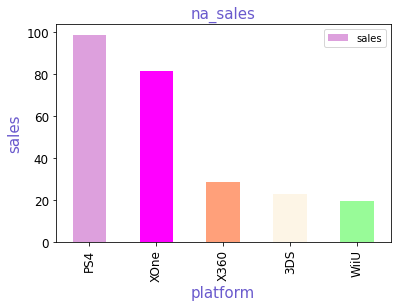

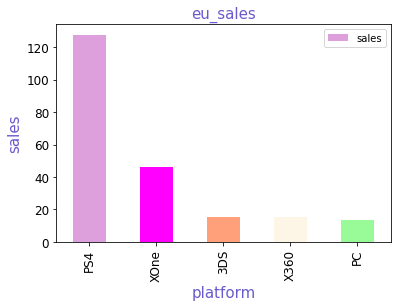

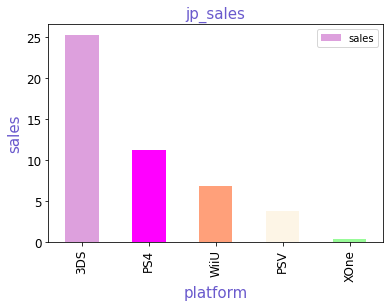

In [131]:
#Создадим переменную, в которой будут содержаться цвета для наших столбчатых диаграмм
colors = ["plum", "magenta", "lightsalmon", 'oldlace', 'palegreen']
#Построим столбчатую диаграмму по столбцу, назначим цвета 
na_df_top.plot(kind = 'bar', y = 'na_sales', color = colors, label = 'sales')
#Установим подпись оси х
plt.xlabel('platform', fontsize=15, color='slateblue')
#Установим подпись оси y
plt.ylabel('sales', fontsize=15, color='slateblue')
#Установим размер отметок по осям х и y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('na_sales', fontsize=15, color='slateblue')

eu_df_top.plot(kind = 'bar', y = 'eu_sales', color = colors, label = 'sales')
plt.xlabel('platform', fontsize=15, color='slateblue')
plt.ylabel('sales', fontsize=15, color='slateblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('eu_sales', fontsize=15, color='slateblue')

jp_df_top.plot(kind = 'bar', y = 'jp_sales', color = colors, label = 'sales')
plt.xlabel('platform', fontsize=15, color='slateblue')
plt.ylabel('sales', fontsize=15, color='slateblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('jp_sales', fontsize=15, color='slateblue')

Text(0.5, 1.0, 'jp_sales')

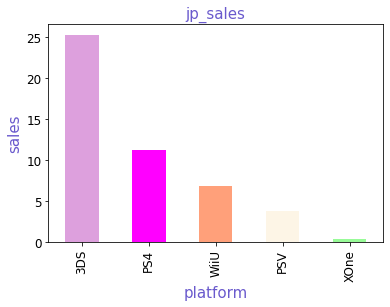

In [132]:
jp_df_top.plot(kind = 'bar', y = 'jp_sales', color = colors, label = 'sales', legend=False)
plt.xlabel('platform', fontsize=15, color='slateblue')
plt.ylabel('sales', fontsize=15, color='slateblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('jp_sales', fontsize=15, color='slateblue')

В Северной Америке и Европе внушительную долю рынка заняла платформа PS4, но в Северной Америке отрыв между платформой-лидером и второй платформой Xone совсем не велик по сравнению с отрывом в двух других регионах. В Японии лидирует 3DS. В Европе и Северной Америке кроме лидеров одинаковы и платформы, занимающие второе место. Рынки Северной Америки и Европы имеют больше сходств между собой, чем с Японским рынком. В Европе три платформы с конца не имеют большого отрыва друг от друга. Сильнее всего заметен отрыв между тремя последними платформами в Японии.

## Жанры по регионам

Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [133]:
#Создадим сводную таблицу для оценки популярности жанров игр по Северной Америке
na_genre_df = games_actual_df.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')

In [134]:
#Выводим сводную таблицу
display(na_genre_df)

,na_sales
genre,
Action,67.37
Adventure,4.96
Fighting,11.66
Misc,12.58
Platform,6.57
Puzzle,0.65
Racing,8.46
Role-Playing,31.46
Shooter,74.76


In [135]:
#Создадим
na_genre_df_top = na_genre_df.nlargest(5, 'na_sales')

In [136]:
#Выводим сводную таблицу
display(na_genre_df_top)

,na_sales
genre,
Shooter,74.76
Action,67.37
Sports,40.04
Role-Playing,31.46
Misc,12.58


In [137]:
eu_genre_df = games_actual_df.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')

In [138]:
#Выводим сводную таблицу
display(eu_genre_df)

,eu_sales
genre,
Action,66.14
Adventure,5.33
Fighting,5.86
Misc,9.83
Platform,6.40
Puzzle,0.45
Racing,12.73
Role-Playing,25.97
Shooter,59.55


In [139]:
eu_genre_df_top = eu_genre_df.nlargest(5, 'eu_sales')

In [140]:
#Выводим сводную таблицу
display(eu_genre_df_top)

,eu_sales
genre,
Action,66.14
Shooter,59.55
Sports,36.75
Role-Playing,25.97
Racing,12.73


In [141]:
jp_genre_df = games_actual_df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')

In [142]:
#Выводим сводную таблицу
display(jp_genre_df)

,jp_sales
genre,
Action,10.42
Adventure,0.37
Fighting,4.35
Misc,2.57
Platform,2.63
Puzzle,0.53
Racing,1.52
Role-Playing,18.23
Shooter,4.24


In [143]:
jp_genre_df_top = jp_genre_df.nlargest(5, 'jp_sales')

In [144]:
display(jp_genre_df_top)

,jp_sales
genre,
Role-Playing,18.23
Action,10.42
Fighting,4.35
Shooter,4.24
Platform,2.63


Text(0.5, 1.0, 'jp_sales')

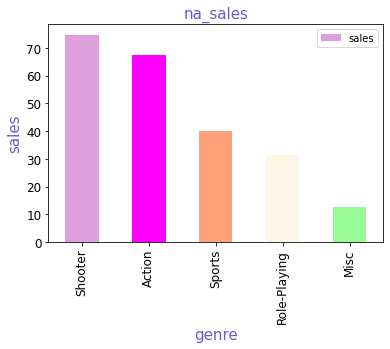

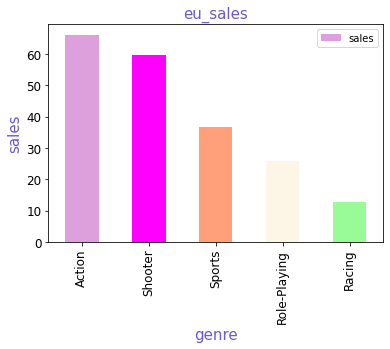

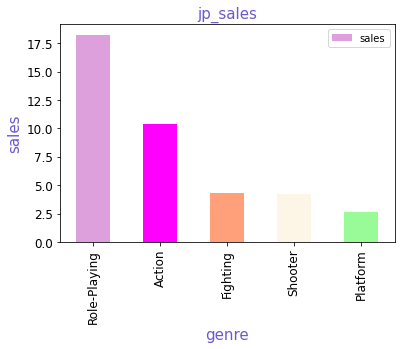

In [145]:
#Создадим переменную, в которой будут содержаться цвета для наших столбчатых диаграмм
colors = ["plum", "magenta", "lightsalmon", 'oldlace', 'palegreen']
#Построим столбчатую диаграмму по столбцу, назначим цвета 
na_genre_df_top.plot(kind = 'bar', y = 'na_sales', color = colors, label = 'sales')
#Установим подпись оси х
plt.xlabel('genre', fontsize=15, color='slateblue')
#Установим подпись оси y
plt.ylabel('sales', fontsize=15, color='slateblue')
#Установим размер отметок по осям х и y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('na_sales', fontsize=15, color='slateblue')
eu_genre_df_top.plot(kind = 'bar', y = 'eu_sales', color = colors, label = 'sales')
plt.xlabel('genre', fontsize=15, color='slateblue')
plt.ylabel('sales', fontsize=15, color='slateblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('eu_sales', fontsize=15, color='slateblue')
jp_genre_df_top.plot(kind = 'bar', y = 'jp_sales', color = colors, label = 'sales')
plt.xlabel('genre', fontsize=15, color='slateblue')
plt.ylabel('sales', fontsize=15, color='slateblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('jp_sales', fontsize=15, color='slateblue')

В каждом регионе лидируют разные жанры. Для Северной Америки лидером является шутер, для Европы- экшн, для Японии- ролевые игры. Опять же, топы-5 популярных жанров в Европе и Северной Америке похожи между собой, а вот геймеры в Японии, вероятно, имеют иные предпочтения. В это же время, есть относительное сходство в популярности жанра экшен во всех трёх регионах..
Кроме того, по графикам мы можем в очередной раз убедиться в различиях размеров рынков.

## Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Краткий экскурс по абревиатурам ESRB (источник: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board#%D0%94%D0%B5%D0%B9%D1%81%D1%82%D0%B2%D1%83%D1%8E%D1%89%D0%B8%D0%B5):
«EC» («Early childhood») — «Для детей младшего возраста»,
«E» («Everyone») — «Для всех»,
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»,
«T» («Teen») — «Подросткам»,
«M» («Mature») — «Для взрослых»,
«AO» («Adults Only 18+») — «Только для взрослых»,
«RP» («Rating Pending») — «Рейтинг ожидается».

In [146]:
#Посмотрим какие абревиатуры есть в нашем датафрейме
games_actual_df['rating'].unique()

array(['absent', 'M', 'E', 'T', 'E10+'], dtype=object)

Как мы видим, в нашем датафрейме есть не все типы игры по шкале ESRB. Если быть точнее, то у нас присутствуют игры для взрослых, игры для всех, игры для людей от 10 лет,игры для подростков и также есть пропущенные значения.

In [147]:
na_games = games_actual_df.groupby('rating')['na_sales'].sum()

In [148]:
display(na_games)

rating
E         45.08
E10+      30.54
M         90.85
T         35.94
absent    59.60
Name: na_sales, dtype: float64

В Северной Америке с большим отрывом лидируют игры для взрослых, пользуются спросом игры без конкретной возрастной маркировки(=для всех). На игры для подростков и для детей от 10 лет тоже есть спрос.

In [149]:
eu_games = games_actual_df.groupby('rating')['eu_sales'].sum()

In [150]:
display(eu_games)

rating
E         47.90
E10+      22.56
M         85.57
T         29.84
absent    50.19
Name: eu_sales, dtype: float64

В Европейском сегменте, также как и в северо-американском популярны игры для взрослых-они беспрецендетно лидируют. На втором месте игры для всех, опять же, такая же ситуация и в север.Америке. Игры для подростков и детей от 10 лет имеют не большой отрыв между собой.

In [151]:
jp_games = games_actual_df.groupby('rating')['jp_sales'].sum()

In [152]:
display(jp_games)

rating
E          8.17
E10+       3.68
M          5.99
T          7.96
absent    21.66
Name: jp_sales, dtype: float64

Как мы видим, самую большую часть японского рынка заняли игры без данного возрастного рейтинга, скорее всего агентство не оценивало данные игры. Возможно, это игры японских разработчиков, существующие только на азиатском рынке и агентство не занимается оценкой таких локальных игр.
Ситуация с лидерством тут отличается от двух преддущих регионов, многие покупатели предпочитают игры для всех, с небольшим отрывом виден интерес к играм для подростков, и только на третьем месте стоят игры для взрослых. Спрос на игры для детей от 10 лет есть, но меньше.

В целом можно сделать вывод, что данный рейтинг влияет на продажи в отдельных регионах. Какие-то игры с возрастными маркировками популярнее других и распределение отличается от региона к региону. Особенно в очередной раз отличился Японский рынок игр, но из-за большого количества игр с неуказанной маркировкой мы не можем выделять игры по возрастным сегментам с большой точностью.

# 5.Проверка гипотез

## Первая гипотеза

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые."-эта гипотеза Н0 является двусторонней. Н1 будет звучать так: "Средние пользовательские рейтинги платформ Xbox One и PC отличны друг от друга'. Нам подойдет метод проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [153]:
xone_df = games_actual_df.query('platform == "XOne"')

In [154]:
#Удалим заглушки по аналогии с удалением перед вычислением корреляций
xone_df = xone_df.query('user_score != 0')

In [155]:
pc_df = games_actual_df.query('platform == "PC"')

In [156]:
#Удалим заглушки по аналогии с удалением перед вычислением корреляций
pc_df = pc_df.query('user_score != 0')

In [157]:
xone_score = xone_df['user_score']
xone_score = xone_score.tolist()

In [158]:
print('Средний пользовательский рейтинг платформы Xbox One равен:', xone_df['user_score'].mean())

Средний пользовательский рейтинг платформы Xbox One равен: 6.573026315789474


In [159]:
pc_score = pc_df['user_score']
pc_score = pc_score.tolist()

In [160]:
print('Средний пользовательский рейтинг платформы PC равен:', pc_df['user_score'].mean())

Средний пользовательский рейтинг платформы PC равен: 6.301724137931035


In [161]:
alpha = .01 #задаём критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xone_score, pc_score)
#проверка гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) #выводим на экран получившеся p-значение

if results.pvalue < alpha:
    #сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2297988401146674
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги этих двух платформ не равны, т.е нулевая гипотеза была отвергнута выше. Причины произошедшего видны и по p-value, и по результатам выведения на экран пользовательских рейтингов.

## Вторая гипотеза

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [162]:
action_df = games_actual_df.query('genre == "Action"')

In [163]:
#Удалим заглушки по аналогии с удалением перед вычислением корреляций
action_df = action_df.query('user_score != 0')

In [164]:
sports_df = games_actual_df.query('genre == "Sports"')

In [165]:
#Удалим заглушки по аналогии с удалением перед вычислением корреляций
sports_df = sports_df.query('user_score != 0')

In [166]:
action_score = action_df['user_score']
action_score = action_score.tolist()

In [167]:
sports_score = sports_df['user_score']
sports_score = sports_score.tolist()

In [168]:
print('Средний пользовательский рейтинг жанра Action равен:', action_df['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports равен:', sports_df['user_score'].mean())

Средний пользовательский рейтинг жанра Action равен: 6.720093457943925
Средний пользовательский рейтинг жанра Sports равен: 5.480459770114942


In [169]:
alpha = .05 #задаём критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sports_score, action_score)
#проверка гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) #выводим на экран получившеся p-значение

if results.pvalue < alpha:
    #сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.754076007605816e-10
Отвергаем нулевую гипотезу


Разницами между средними пользовательскими рейтингами двух жанров действительно слишком велика, чтобы подтверждать гипотезу об их равенстве.

# Общий вывод

В результате исследования мы можем выделить пару интересных наблюдений:
1)Японский рынок сильно отличается от Северо-Американского и от Европейского. Прежде всего отличие состоит в предпочтениях жанров. При этом рынки Европы и Северной Америки похожи в этом вопросе, но не идентичны.
2)С 2011 года наблюдается спад интереса к компьютерным играм, в соответсутвующем пункте я написала свои предположения,связанные с ростом доступности смартфонов и расширением их функционала.

Было обнаружено пару закономерностей и на их основе были сделаны определенные выводы: 
1)Нужно делать упор на популярные жанры, ибо жанр игры тесно взаимосвязан с количеством продаж. Популярность жанра зависит от региона.
2)Есть более популярные платформы, есть менее. Вероятно, игры лучших платформ более качественны и более ожидаемы пользователями. Нужно обеспечить наличие новинок популярных платформ и засчёт этого повышать спрос покупателей к магазину "Стримчик".
3)Оценки критиков и пользователей не имеют ярко выраженной корреляции с успехом в продажах игр. Прослеживаются слабые, средне-слабые и средние взаимосвязи между одним из написанных выше показателей и суммой продаж.

Если мы говорим про европейские страны, то идеальной игрой является игра с рейтингом по ESRB 'для взрослых' и жанром экшен от платформы PS4.
Если речь идёт о Северной Америке, то для населения этого региона предпочтительнее игры жанра шутер с рейтингом по ESRB 'для взрослых' и от платформы PS4.
На Японском рынке с высокой вероятностью будет успешна игра "для всех" по рейтингу ESRB в жанре ролевой игры от платформы 3DS.